# ML Avanti Bootcamp - Projeto de Detecção Facial - ETAPA 1

### Objetivo

Analisar o dataset e apresentar informações do dataset


### 1. Baixar o Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset/dat")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vitorg4x@gmail.com
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset


100%|██████████| 4.43G/4.43G [01:08<00:00, 69.9MB/s]


In [3]:
!ls

face-detection-dataset	sample_data


### 2. Dataframe com os metadados das imagens e algumas verificações

In [4]:
import cv2
import os

In [5]:
root_dir = './face-detection-dataset/images'
print(root_dir)

train_images = os.listdir('./face-detection-dataset/images/train')
val_images = os.listdir('./face-detection-dataset/images/val')

train_labels = os.listdir('./face-detection-dataset/labels/train')
val_labels = os.listdir('./face-detection-dataset/labels/val')

./face-detection-dataset/images


In [6]:
#Conferência da quantidade de imagens e labels em treino e validação
print("=== IMAGENS ===")
print("Treino:", len(train_images))
print("Validação:", len(val_images))

print("\n=== LABELS ===")
print("Treino:", len(train_labels))
print("Validação:", len(val_labels))

=== IMAGENS ===
Treino: 13386
Validação: 3347

=== LABELS ===
Treino: 13386
Validação: 3347


In [7]:
#Conferência de imagens sem label

#Treino
missing_labels = []

for img in train_images:
    label_name = img.replace('.jpg', '.txt')
    if label_name not in train_labels:
        missing_labels.append(img)

print("Imagens treino sem label:", len(missing_labels))

#Validação
missing_labels = []

for img in val_images:
    label_name = img.replace('.jpg', '.txt')
    if label_name not in val_labels:
        missing_labels.append(img)

print("Imagens validação sem label:", len(missing_labels))


Imagens treino sem label: 0
Imagens validação sem label: 0


In [8]:
#Verifica labels de treino sem imagem
orphan_labels = []

for label in train_labels:
    img_name = label.replace('.txt', '.jpg')
    if img_name not in train_images:
        orphan_labels.append(label)

print("Labels treino sem imagem:", len(orphan_labels))


Labels treino sem imagem: 0


In [9]:
#Validação do formato Yolo
#0 x_center y_center width height

def check_yolo_values(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            values = list(map(float, line.strip().split()))
            coords = values[1:]
            if any(v < 0 or v > 1 for v in coords):
                return False
    return True

# Testar algumas labels
for label in train_labels[:20]:
    path = './face-detection-dataset/labels/train/' + label
    if not check_yolo_values(path):
        print("Erro encontrado em:", label)



In [10]:
#visualização teste
import matplotlib.pyplot as plt

def visualize_sample(image_dir, label_dir, image_name):

    # Caminhos
    img_path = os.path.join(image_dir, image_name)
    label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt'))

    # Ler imagem
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape

    # Verificar se existe label
    if not os.path.exists(label_path):
        print("Label não encontrada para:", image_name)
        return

    # Ler anotações
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        values = list(map(float, line.strip().split()))
        class_id, x_center, y_center, width, height = values

        # Converter YOLO → pixel
        x_center *= w
        y_center *= h
        width *= w
        height *= h

        xmin = int(x_center - width / 2)
        ymin = int(y_center - height / 2)
        xmax = int(x_center + width / 2)
        ymax = int(y_center + height / 2)

        # Desenhar bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [11]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.3 MB/s eta 0:00:00


In [12]:
import pandas as pd
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
count_corrupted = 0
corrupted = list()

In [13]:
dataframe_list = list()
for folder in os.listdir(root_dir):
  child_dir = os.path.join(root_dir, folder)

  for image in os.listdir(child_dir):
    img_dir = os.path.join(child_dir, image)
    _, image_format = image.split('.')
    image_format = image_format.lower()
    img = cv2.imread(img_dir)


    if img is not None:
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Converter a imagem OpenCV para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      # Gerar o hash da imagem (usando perceptual hash como exemplo)
      img_hash = imagehash.phash(img_pil)
      width, height, channels = img.shape
      img_corrupted = False
    else:
      count_corrupted += 1
      corrupted.append(img_dir)
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [14]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [15]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)

In [16]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./face-detection-dataset/images/val/f29e282948...,False,da2d2c7e8c12c74d,jpg,768,1024,3,val
1,./face-detection-dataset/images/val/4f0b2c7c7c...,False,aa1dfd2394c339c4,jpg,768,1024,3,val
2,./face-detection-dataset/images/val/e1fe92cde6...,False,cba50d52433f3dc8,jpg,1024,683,3,val
3,./face-detection-dataset/images/val/9cc905c44e...,False,8a1bf6851ea09bdc,jpg,1024,1024,3,val
4,./face-detection-dataset/images/val/49729cbe3d...,False,86e9398f3c0e53e2,jpg,678,1024,3,val


### 3. Integridade dos Arquivos


In [17]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,806.545867,950.27395,3.0
std,160.886651,151.54427,0.0
min,270.000000,279.00000,3.0
max,3968.000000,4608.00000,3.0


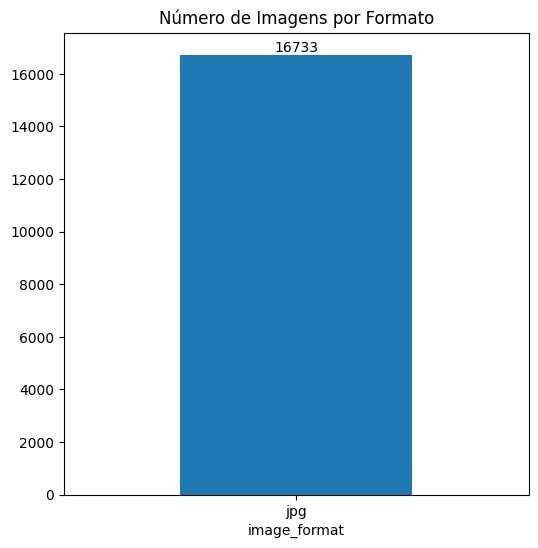

In [18]:
#Quantidade de Imagens por formato

# Geração do gráfico de barras
ax = df['image_format'].value_counts().plot(kind='bar', title='Número de Imagens por Formato', figsize=(6, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=0)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 4. Consistência dos Metadados

#Distribuição das Dimensões de Altura e Largura das Imagens

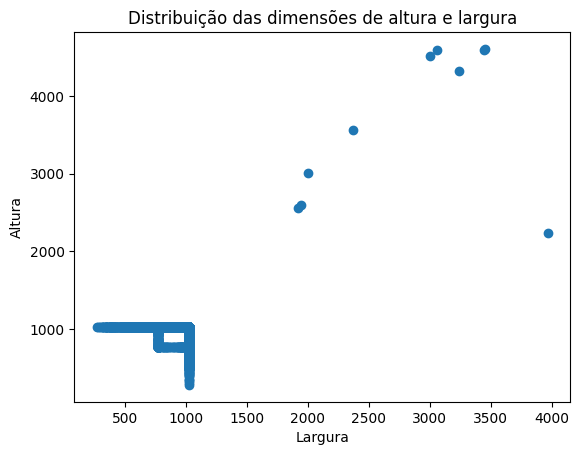

In [19]:
plt.scatter(df['width'], df['height'])
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.title('Distribuição das dimensões de altura e largura')
plt.show()



#Quantidade de informações nulas

In [20]:
df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


### 5. Qualidade das Imagens

In [21]:

!pip -q install pillow

import os
import cv2
from PIL import Image, UnidentifiedImageError

def eh_imagem_corrompida(caminho):



    if not isinstance(caminho, str) or caminho.strip() == "" or caminho.strip().lower() == "nan":
        return True


    if not os.path.exists(caminho):
        return True


    if os.path.getsize(caminho) == 0:
        return True


    try:
        with Image.open(caminho) as img:
            img.verify()
    except (UnidentifiedImageError, OSError, ValueError):
        return True


    img_cv = cv2.imread(caminho)
    if img_cv is None:
        return True


    try:
        if img_cv.ndim == 3 and img_cv.shape[2] >= 3:
            _ = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    except Exception:
        return True

    return False


if "df" not in globals():
    raise RuntimeError("Não achei o DataFrame 'df'. Rode as células anteriores até criar o df.")

if "image_path" not in df.columns:
    raise RuntimeError("Não achei a coluna 'image_path' no df. Confira onde está o caminho das imagens.")

df["corrupted_q5"] = [eh_imagem_corrompida(p) for p in df["image_path"].tolist()]

count_corrupted_q5 = int(df["corrupted_q5"].sum())
corrupted_q5 = df.loc[df["corrupted_q5"], "image_path"].tolist()

print("ETAPA 5 (Qualidade das Imagens) concluída ✅")
print("Total com problema (corrupted_q5=True):", count_corrupted_q5)
print("Exemplos (até 10):")
for p in corrupted_q5[:10]:
    print("-", p)




ETAPA 5 (Qualidade das Imagens) concluída ✅
Total com problema (corrupted_q5=True): 0
Exemplos (até 10):


### 6. Distribuição das Classes

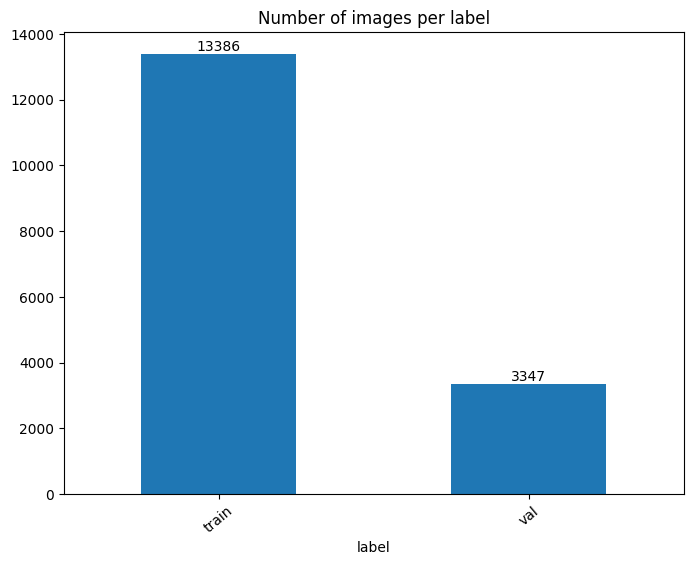

In [22]:
ax = df['label'].value_counts().plot(kind='bar', title='Number of images per label', figsize=(8,6))

plt.xticks(rotation=40)

for p in ax.patches:
  ax.annotate(str(int(p.get_height())),
              (p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom', fontsize=10)


plt.show()

### 7. Verificação de Imagens Duplicadas

In [23]:
#Quantidade de imagens duplicadas

df['image_hash'].duplicated().sum()

np.int64(0)

In [24]:
#Imagens duplicadas

df_duplicated = df[df['image_hash'].duplicated()]
df_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label,corrupted_q5


In [25]:
#Imagens correspondentes a cada imagem duplicada

duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['image_hash']
  duplicated = df[df['image_hash'] == hash_duplicated]["image_path"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

duplicated_images

{}

In [26]:
#Verificar hashes com mais de uma imagem
duplicated_groups = df[df.duplicated('image_hash', keep=False)] \
                        .groupby('image_hash')['image_path'] \
                        .apply(list)

for hash_value, paths in duplicated_groups.items():

    if len(paths) >= 2:
        image1 = cv2.imread(paths[0])
        image2 = cv2.imread(paths[1])

        #Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
        image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        #Mostrar a primeira imagem
        axes[0].imshow(image1_rgb)
        axes[0].axis('off')
        axes[0].set_title(f'Original\n{paths[0].split("/")[-1]}')

        #Mostrar a segunda imagem
        axes[1].imshow(image2_rgb)
        axes[1].axis('off')
        axes[1].set_title(f'Duplicada\n{paths[1].split("/")[-1]}')

        #Exibir as imagens
        plt.suptitle(f'Hash: {hash_value}')
        plt.tight_layout()
        plt.show()

In [27]:
#Agrupando duplicatas por classe
duplicates_by_class = df_duplicated.groupby('label').size()

#Validação de arquivos duplicados
if not duplicates_by_class.empty:

    ax = duplicates_by_class.plot(
        kind='bar',
        title='Number of duplicates per class',
        figsize=(8, 6)
    )

    #Adicionando valores nas barras
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())),
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            xytext=(0, 3),
            textcoords='offset points'
        )

    plt.xticks(rotation=40)
    plt.tight_layout()
    plt.show()

else:
    print("Sem arquivos duplicados")

Sem arquivos duplicados
